# Gaussian naive Bayes classifier

In this note, we implement a Gaussian naive bayes classifier. It utilizes Bayes' theorem,
$$
P(C_k|x_1,x_2,\dots,x_n)=\frac{P(C_k)P(x_1,x_2,\dots,x_n|C_k)}{P(x_1,x_2,\dots,x_n)},
$$
where
- $P(A,B,\dots|\alpha,\beta,\dots)$: the probability of $A,B,\dots$ occuring given $\alpha,\beta,\dots$ happened.
- $P(A)$: the probability of $A$ occuring.<br>

Specifically, $P(C_k|x_1,x_2,\dots,x_n)$ is called the posterior probability, $P(C_k)$ the a prior probability, $P(x_1,x_2,\dots,x_n|C_k)$ the likelihood, and $P(x_1,x_2,\dots,x_n)$ the evidence.<br>
Here, assuming that each observation is independent of others, hence the name "naive", one finds
$$
P(A,B|C) = P(A|C)P(B|C).
$$
That is, $P(C_k|x_1,x_2,\dots,x_n)$ can be written as
$$
\begin{align}
P(C_k|x_1,x_2,\dots,x_n)&=\frac{P(C_k)}{P(x_1,x_2,\dots,x_n)}P(x_1|C_k)P(x_2|C_k)\cdots P(x_n|C_k)\\
&=\frac{P(C_k)\prod_{i}^{n}P(x_i|C_k)}{P(x_1,x_2,\dots,x_n)}.
\end{align}
$$
With this, one can assign a label $\hat{y}$ to a new observation,
$$
\hat{y} = \mathop{\mathrm{argmax}}_{k\in\{1,\dots,K\}}P(C_k)\prod_{i}^{n}P(x_i|C_k).
$$
Note that, in the above expression, the denominator is not considered since it does not depend on $C_k$.

In a Gaussian naive Bayes model, each conditional probability $P(x_i|C_k)$ is assumed to follow a Gaussian distribution, which is uniquely characterized by a mean and standard deviation (std). In the traning phase, therefore, the algorithm tries to estimate the mean and std of $x_i$ that belong to the class $k$.

In this note, the implementation is as follows:
- we estimate a priori probability $P(C_k)$ from the number of occurences of the class $k$.
- we find the mean and the std of the training data $x_i$ that are classified as $C_k$.
- with the mean and std, we formulate the corresponding conditional probability $P(x_i|C_k)$ from the Gaussian distribution.
- we classify new data using naive Bayes classifier.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [6]:
class GaussianNBC():
    def __init__(self,X,y):
        """
        Initializing Gaussian naive bayes.
        """
        self.labels, self.y_counts = np.unique(y, return_counts=True)
        self.aprior = np.array([i/np.sum(self.y_counts) for i in self.y_counts])
        self.N      = X.shape[1]
        
    def train(self,X,y):
        """
        Training the model. It calculates the averages and stds from the traning data.
        """
        X_sep = []
        for i in range(len(self.labels)):
            X_sep.append(X[np.where(y==i)])
        self.X_mean = np.array([np.average(x,axis=0) for x in X_sep])
        self.X_std  = np.array([np.std(x,axis=0) for x in X_sep])
    
    def gaussian(self, x, mean, std):
        """
        Returning "conditional" probabilities from the averages and stds.
        """
        return np.exp(-0.5*((x-mean)/std)**2)/(std*np.sqrt(2*np.pi))
    
    def classify(self,X_test):
        """
        Computing the posterior probabilities, and assigning the labels of more probable classes.
        It returns an array of labels.
        """
        prob = []
        for i in range(len(self.labels)):
            temp = np.ones(X_test.shape[0])*self.aprior[i]
            for j in range(self.N):
                temp *= self.gaussian(X_test[:,j], self.X_mean[i,j], self.X_std[i,j])
            prob.append(temp)
        return np.argmax([*prob],axis=0)

In [7]:
n_samples = 4000
n_components = 3

X, y = make_blobs(n_samples=n_samples, centers=n_components, cluster_std=2,random_state=2)
X_train, y_train, X_test, y_test = X[:3000], y[:3000], X[3000:], y[3000:]

In [8]:
model = GaussianNBC(X_train,y_train)
model.train(X_train,y_train)
y_results = model.classify(X_test)

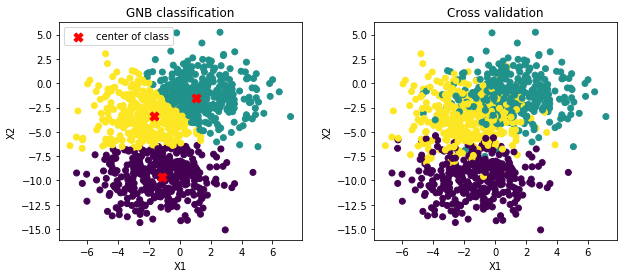

In [38]:
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(10,4))
plt.subplots_adjust(wspace=0.3)
ax0.scatter(X_test[:,0],X_test[:,1],c=y_results)
ax0.scatter(model.X_mean[:,0],model.X_mean[:,1],s=80,marker='X',color='red',label=r'center of class')
ax0.set_xlabel('X1')
ax0.set_ylabel('X2')
ax0.set_title('GNB classification')
ax0.legend()
ax1.scatter(X_test[:,0],X_test[:,1],c=y_test)
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('Cross validation')
plt.show()